### 1. Model Performance Comparison Plots

In [ ]:
from geo_analysis_tran import analysis_model
k = 5
gigtran_test_acc_list = [analysis_model(k=5, fold_n=fold_n, model_name='gigtran', graoh_opt='GinG') for fold_n in range(1, k+1)]
gigtran_all_test_acc_list = gigtran_test_acc_list.append(sum(gigtran_test_acc_list) / len(gigtran_test_acc_list))
gigtran_pheno_test_acc_list = [analysis_model(k=5, fold_n=fold_n, model_name='gigtran-pheno', graoh_opt='subject') for fold_n in range(1, k+1)]
gigtran_pheno_all_test_acc_list = gigtran_pheno_test_acc_list.append(sum(gigtran_pheno_test_acc_list) / len(gigtran_pheno_test_acc_list))
gigtran_gene_test_acc_list = [analysis_model(k=5, fold_n=fold_n, model_name='gigtransformer-norm', graoh_opt='gene') for fold_n in range(1, k+1)]
gigtran_gene_all_test_acc_list = gigtran_gene_test_acc_list.append(sum(gigtran_gene_test_acc_list) / len(gigtran_gene_test_acc_list))


In [ ]:
from geo_analysis_tran import analysis_model
k = 5
gigtran_test_acc_list = [analysis_model(fold_n=fold_n, graoh_opt='GinG') for fold_n in range(1, k+1)]
gigtran_all_test_acc_list = gigtran_test_acc_list.append(sum(gigtran_test_acc_list) / len(gigtran_test_acc_list))

TypeError: analysis_model() got an unexpected keyword argument 'model_name'

In [1]:
gigtran_all_test_acc_list = [0.758007, 0.793594, 0.811388, 0.804270, 0.765125, 0.7865]
gigtran_pheno_all_test_acc_list = [0.708185, 0.790036, 0.743772, 0.797153, 0.761565, 0.7601]
gigtran_gene_all_test_acc_list = [0.743772, 0.718861, 0.754448, 0.718861, 0.729537, 0.7331]

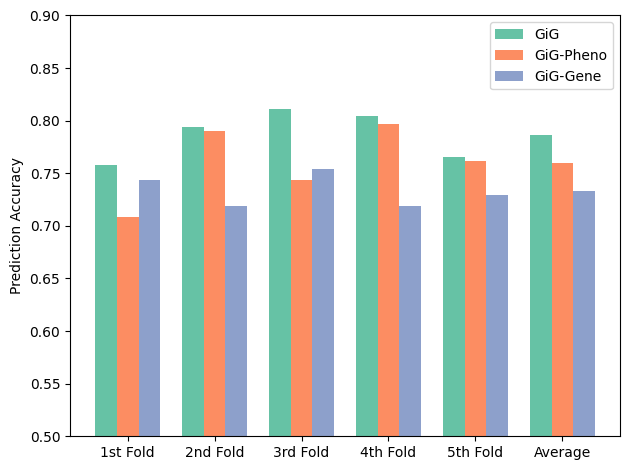

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette("Set2", 5)
labels = ['1st Fold', '2nd Fold', '3rd Fold', '4th Fold', '5th Fold', 'Average']
x = np.arange(len(labels))
width = 0.25 
sns.set_style(style=None)
gigtran = plt.bar(x - 1*width, gigtran_all_test_acc_list, width, label='GiG', color=colors[0])
gigtran_pheno = plt.bar(x, gigtran_pheno_all_test_acc_list, width, label='GiG-Pheno', color=colors[1])
gigtran_gene = plt.bar(x + 1*width, gigtran_gene_all_test_acc_list, width, label='GiG-Gene', color=colors[2])
plt.ylabel('Prediction Accuracy')
plt.ylim(0.5, 0.9)
plt.xticks(x, labels=labels)
plt.legend()
sns.despine(left=False, bottom=False, top=False, right=False)
plt.tight_layout()

In [3]:
gigtran_all_test_acc_list = [0.758007, 0.793594, 0.811388, 0.804270, 0.765125, 0.7865]
gat_test_acc_list = [0.754448, 0.672598, 0.740214, 0.590747, 0.72242, 0.696085]
rf_test_acc_list = [0.7473, 0.7509, 0.7794, 0.7758, 0.7295, 0.7559]

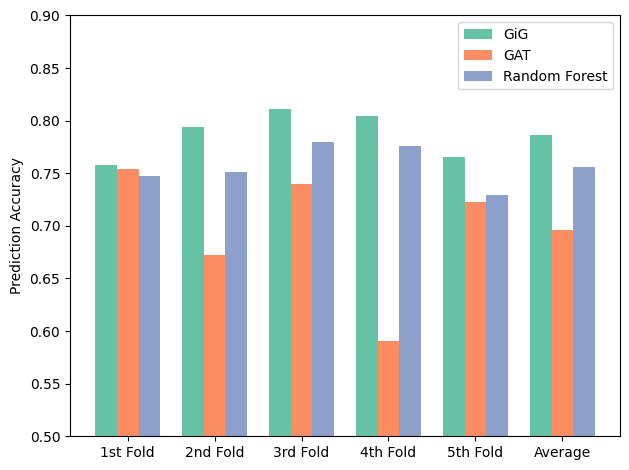

In [4]:
colors = sns.color_palette("Set2", 5)
labels = ['1st Fold', '2nd Fold', '3rd Fold', '4th Fold', '5th Fold', 'Average']
x = np.arange(len(labels))
width = 0.25 
sns.set_style(style=None)
gigtran = plt.bar(x - 1*width, gigtran_all_test_acc_list, width, label='GiG', color=colors[0])
gat = plt.bar(x, gat_test_acc_list, width, label='GAT', color=colors[1])
rf = plt.bar(x + 1*width, rf_test_acc_list, width, label='Random Forest', color=colors[2])
plt.ylabel('Prediction Accuracy')
plt.ylim(0.5, 0.9)
plt.xticks(x, labels=labels)
plt.legend()
sns.despine(left=False, bottom=False, top=False, right=False)
plt.tight_layout()

### 2. Gene Enrichment Analysis

#### 2.1 Common Norms

In [4]:
import pandas as pd
t2ds_norm_refilter_node_weight_df = pd.read_csv('./analysis/gigtransformer-norm/t2ds_norm_refilter_node_weight_df.csv')
t2ds_norm_enrichment_gene_txt = t2ds_norm_refilter_node_weight_df['gene_node_name']
t2ds_norm_enrichment_gene_txt.to_csv('./analysis/gigtransformer-norm/t2ds_norm_enrichment_gene.txt', index=False, header=False)

In [ ]:
t2ds_enrichment_common_norm_gene_df = pd.read_csv('./analysis/gigtransformer-norm/t2ds_enriched_common_norm.txt', sep='\t')
t2ds_enrichment_common_norm_gene_df['Enrichment'] = ['Enriched'] * len(t2ds_enrichment_common_norm_gene_df)
t2ds_enrichment_common_norm_gene_df = t2ds_enrichment_common_norm_gene_df.drop(columns=['Gene_name', 'Species', 'No_name'])

t2ds_norm_refilter_node_weight_df
# t2ds_enrichment_common_norm_gene_df

#### 2.2 BiNorms

In [7]:
t2ds_norm_refilter_node_weight_df = pd.read_csv('./analysis/gigtransformer-binorm/t2ds_norm_refilter_node_weight_df.csv')
t2ds_norm_enrichment_gene_txt = t2ds_norm_refilter_node_weight_df['gene_node_name']
t2ds_norm_enrichment_gene_txt.to_csv('./analysis/gigtransformer-binorm/t2ds_norm_enrichment_gene.txt', index=False, header=False)

#### 2.3 RowNorms

In [8]:
import pandas as pd
t2ds_norm_refilter_node_weight_df = pd.read_csv('./analysis/gigtransformer-rownorm/t2ds_norm_refilter_node_weight_df.csv')
t2ds_norm_enrichment_gene_txt = t2ds_norm_refilter_node_weight_df['gene_node_name']
t2ds_norm_enrichment_gene_txt.to_csv('./analysis/gigtransformer-rownorm/t2ds_norm_enrichment_gene.txt', index=False, header=False)

In [9]:
t2ds_enrichment_row_norm_gene_df = pd.read_csv('./analysis/gigtransformer-rownorm/t2ds_enriched_rownorm.txt', sep='\t')
t2ds_enrichment_row_norm_gene_df['Enrichment'] = ['Enriched'] * len(t2ds_enrichment_row_norm_gene_df)
t2ds_enrichment_row_norm_gene_df = t2ds_enrichment_row_norm_gene_df.drop(columns=['Gene Name', 'Species', 'No_name'])
t2ds_enrichment_row_norm_gene_df

,ID,Enrichment
0,BAK1,Enriched
1,BRIP1,Enriched
2,BRCA2,Enriched
3,FES,Enriched
4,TBC1D1,Enriched
5,TNFRSF1A,Enriched
6,TNFRSF1B,Enriched
7,TNFRSF6B,Enriched
8,ADORA2A,Enriched
9,ADRB1,Enriched


In [11]:
t2ds_norm_enrichment_pathway_df = pd.read_csv('./analysis/gigtransformer-rownorm/t2ds_norm_enrichment_pathway.txt', sep='\t')
t2ds_norm_enrichment_pathway_df = t2ds_norm_enrichment_pathway_df[t2ds_norm_enrichment_pathway_df['FDR'] < 0.1]
t2ds_norm_enrichment_pathway_df = t2ds_norm_enrichment_pathway_df[['Term', 'Genes', 'PValue', 'FDR']]
display(t2ds_norm_enrichment_pathway_df)
t2ds_norm_enrichment_pathway_df.to_csv('./analysis/gigtransformer-rownorm/t2ds_norm_enrichment_pathway.csv', index=False)

,Term,Genes,PValue,FDR
0,hsa04621:NOD-like receptor signaling pathway,"BRCC3, NLRC4, NOD2, MEFV, PYCARD, PSTPIP1, TBK...",5.858747e-24,5.565809e-22
1,hsa04623:Cytosolic DNA-sensing pathway,"GSDMD, MLKL, IL18, CGAS, MEFV, PYCARD, AIM2, T...",2.718886e-12,1.050098e-10
2,hsa04217:Necroptosis,"MLKL, VPS4A, TICAM1, SPATA2L, PYCARD, CYLD, IL...",3.316098e-12,1.050098e-10
3,hsa05131:Shigellosis,"ARF1, CALCOCO2, IL1R1, RIPK2, GLMN, IL18, CGAS...",4.594998e-10,1.091312e-08
4,hsa05417:Lipid and atherosclerosis,"MAP2K3, ERO1A, IL18, TICAM1, HSP90B1, PYCARD, ...",2.724947e-08,5.177398e-07
5,hsa05132:Salmonella infection,"MAP2K3, GSDMD, ARF1, MLKL, RIPK2, IL18, NLRC4,...",1.166883e-06,1.847565e-05
6,hsa05135:Yersinia infection,"PYCARD, MAP2K3, TBK1, IL1B, CASP1, IL18, NLRP3...",4.450860e-06,5.879363e-05
7,hsa05164:Influenza A,"PYCARD, TBK1, CALCOCO2, TRAF3, CCL5, IL1B, CAS...",4.951043e-06,5.879363e-05
8,hsa04668:TNF signaling pathway,"MAP2K3, CYLD, MLKL, TRAF3, CCL5, IL1B, PGAM5, ...",7.245348e-06,7.647868e-05
9,hsa04622:RIG-I-like receptor signaling pathway,"CYLD, SIKE1, DDX3X, MAP3K1, TBK1, STING1, TRAF...",1.862204e-05,1.769094e-04


In [12]:
t2ds_norm_refilter_node_weight_df = pd.read_csv('./analysis/gigtransformer-rownorm/t2ds_norm_refilter_node_weight_df.csv')
t2ds_sort_norm_refilter_node_weight_df = t2ds_norm_refilter_node_weight_df.sort_values(by=['Weight'], ascending=False)
t2ds_sort_norm_refilter_node_weight_df

,Unnamed: 0,gene_node_idx,gene_node_name,Weight
0,1203,1202,SMPD2,1.000000
1,847,846,NSMAF,0.571429
2,1326,1325,TP53BP1,0.442722
3,280,279,CTNND1,0.362841
4,801,800,NAIP,0.341688
...,...,...,...,...
95,1124,1123,RPTOR,0.034950
96,794,793,MYD88,0.034829
97,747,746,MAPKAPK3,0.032272
98,1059,1058,RALGDS,0.032183


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
# Create a horizontal bar plot for column A
barplot = sns.barplot(y=t2ds_sort_norm_refilter_node_weight_df['Weight'], x=t2ds_sort_norm_refilter_node_weight_df.index, color='#A6CEE3')  # uniform color for all bars

# Loop through the bars and highlight the ones where column B value is lower than 0.1
for idx, bar in enumerate(barplot.patches):
    if t2ds_sort_norm_refilter_node_weight_df['t2ds_no_t2ds_pvalue'][idx] < 0.1:
        bar.set_color('#FB9A99')  # This will set the color of the bar to red if the condition is met

# Assuming 'OtherColumn' is the name of the other column whose values you want to use as x-labels
plt.xticks(ticks=range(len(t2ds_sort_norm_refilter_node_weight_df)), labels=t2ds_sort_norm_refilter_node_weight_df['gene_node_name'].tolist(), rotation=90)
sns.despine(left=False, bottom=False, top=True, right=True)
# Show the plot
plt.show()

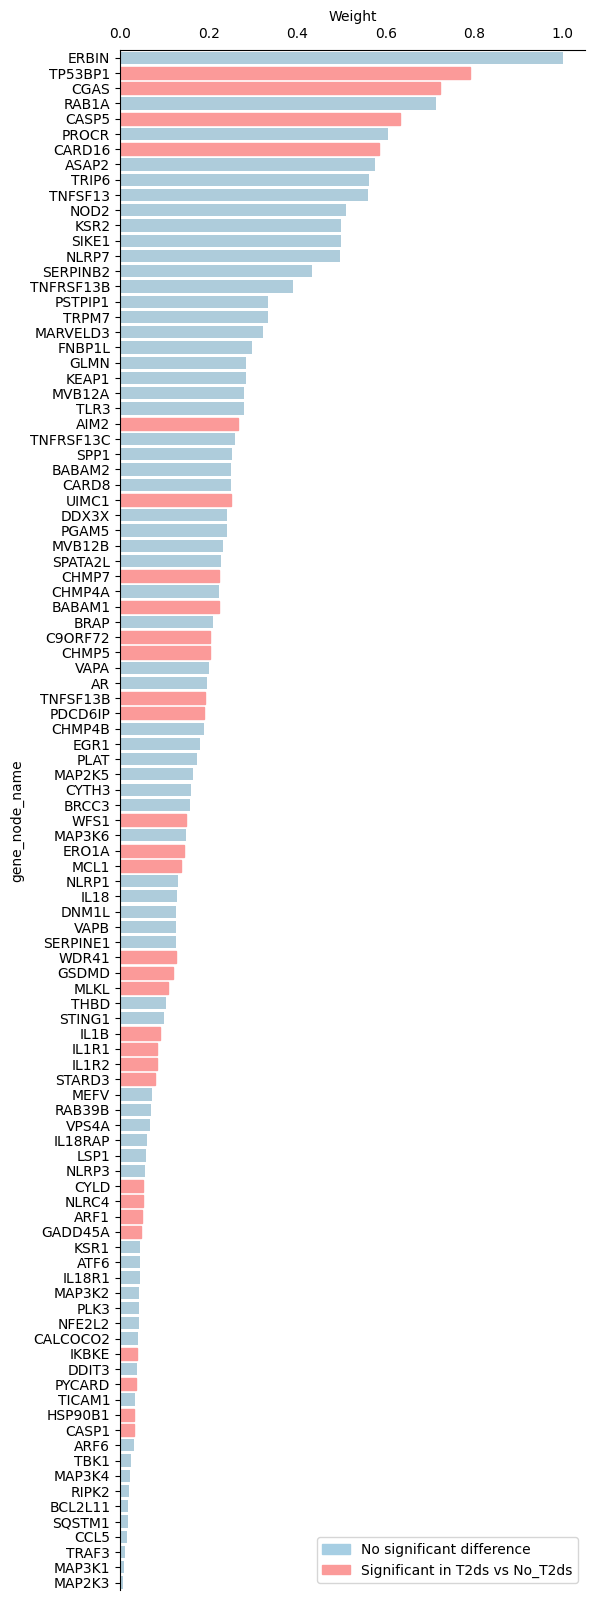

In [14]:
import matplotlib.patches as mpatches

plt.figure(figsize=(6, 20))  # Adjust the figure size to better fit a horizontal bar plot
# Create a horizontal bar plot for column A
barplot = sns.barplot(x=t2ds_sort_norm_refilter_node_weight_df['Weight'], 
                      y=t2ds_sort_norm_refilter_node_weight_df['gene_node_name'], 
                      color='#A6CEE3')  # uniform color for all bars

# Loop through the bars and highlight the ones where column B value is lower than 0.05
for idx, bar in enumerate(barplot.patches):
    if t2ds_sort_norm_refilter_node_weight_df['t2ds_no_t2ds_pvalue'][idx] < 0.05:
        bar.set_color('#FB9A99')  # This will set the color of the bar to red if the condition is met

# Move the x-axis ticks and labels to the top
barplot.xaxis.set_ticks_position('top')
barplot.xaxis.set_label_position('top')
sns.despine(left=False, bottom=True, top=False, right=True)

# Create legend patches
legend_patches = [mpatches.Patch(color='#A6CEE3', label='No significant difference'),
                  mpatches.Patch(color='#FB9A99', label='Significant in T2ds vs No_T2ds')]

# Add legend to the barplot
barplot.legend(handles=legend_patches, loc='lower right')

# Show the plot
plt.show()

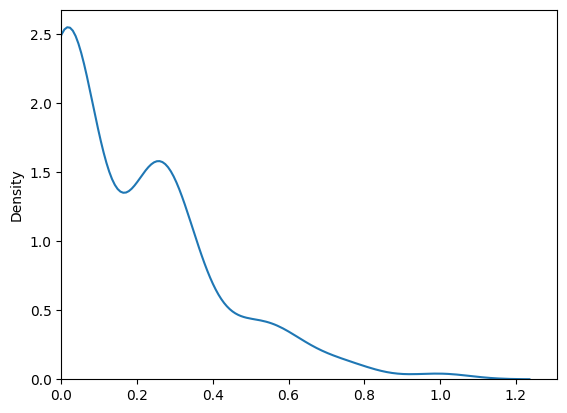

In [15]:
t2ds_norm_refilter_edge_weight_df = pd.read_csv('./analysis/gigtransformer-rownorm/t2ds_norm_refilter_edge_weight_df.csv')
filtered_weight_list = t2ds_norm_refilter_edge_weight_df['Weight'].to_list()

sns.kdeplot(filtered_weight_list, label='Filtered Weight List')
sns.despine(left=False, bottom=False, top=False, right=False)
plt.xlim(0, None) 
plt.show()

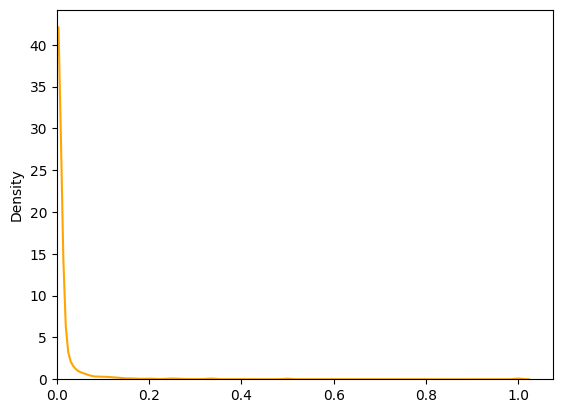

In [16]:
t2ds_layer_norm_average_fold_gene_edge_weight_df = pd.read_csv('./analysis/gigtransformer-rownorm/t2ds_layer_norm_average_fold_gene_edge_weight_df.csv')
weight_list = t2ds_layer_norm_average_fold_gene_edge_weight_df['Weight'].to_list()

# Create a figure and axis to allow for customizations
fig, ax = plt.subplots()
sns.kdeplot(weight_list, label='Weight List', color='orange')
sns.despine(left=False, bottom=False, top=False, right=False)
plt.xlim(0, None)
plt.show()

In [18]:
filtered_nodes_pvalue_list = t2ds_sort_norm_refilter_node_weight_df['t2ds_no_t2ds_pvalue'].to_list()
gene_pvalue_df = pd.read_csv('./analysis/gigtransformer-rownorm/gene_pvalues.csv')
nodes_pvalue_list = gene_pvalue_df['t2ds_no_t2ds_pvalue'].to_list()

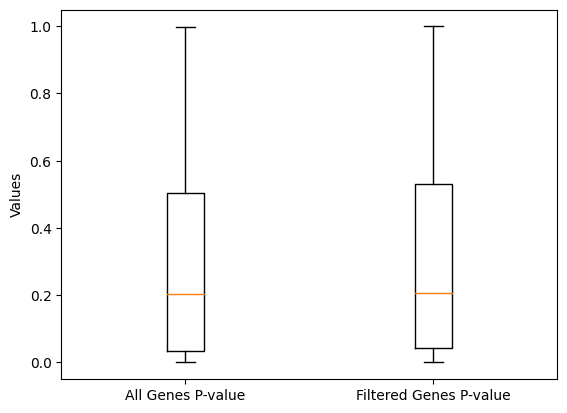

In [19]:
# Create boxplots
plt.boxplot([filtered_nodes_pvalue_list, nodes_pvalue_list], labels=['All Genes P-value', 'Filtered Genes P-value'])
sns.despine(left=False, bottom=False, top=False, right=False)
# plt.title('Comparison of List 1 and List 2')
plt.ylabel('Values')
plt.show()

##### 2.3.1 RowNorms-gene Pvalue

In [20]:
display(t2ds_norm_refilter_node_weight_df)
p_value_t2ds_pret2ds_list = t2ds_norm_refilter_node_weight_df.t2ds_pret2ds_pvalue.to_list()
p_value_t2ds_no_t2ds_list = t2ds_norm_refilter_node_weight_df.t2ds_no_t2ds_pvalue.to_list()
p_value_pret2ds_no_t2ds_list = t2ds_norm_refilter_node_weight_df.pret2ds_no_t2ds_pvalue.to_list()
gene_node_name_list = t2ds_norm_refilter_node_weight_df.gene_node_name.to_list()


,Unnamed: 0,gene_node_idx,gene_node_name,Weight,t2ds_pret2ds_pvalue,t2ds_no_t2ds_pvalue,pret2ds_no_t2ds_pvalue
0,847,846,ERBIN,1.000000,0.298921,0.077998,0.552842
1,2929,2928,TP53BP1,0.790786,0.013710,0.001370,0.734637
2,497,496,CGAS,0.723075,0.467466,0.002642,0.000001
3,2251,2250,RAB1A,0.714109,0.766771,0.061518,0.097091
4,386,385,CASP5,0.632346,0.270931,0.002547,0.049369
...,...,...,...,...,...,...,...
96,2712,2711,SQSTM1,0.017308,0.945272,0.910454,0.800727
97,406,405,CCL5,0.015549,0.701438,0.802947,0.778021
98,2939,2938,TRAF3,0.010952,0.390496,0.938799,0.250745
99,1534,1533,MAP3K1,0.008474,0.510563,0.751766,0.179055


101


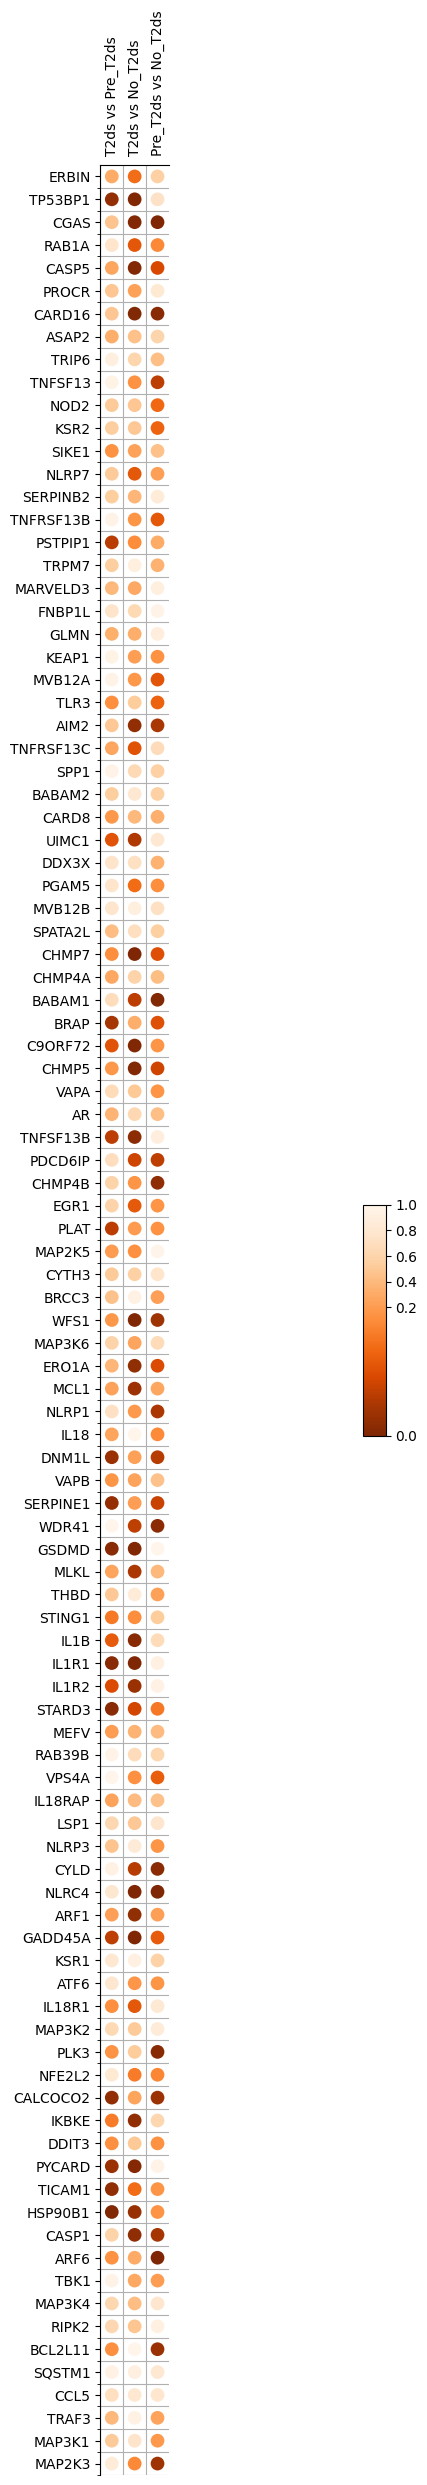

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import TwoSlopeNorm
import pandas as pd

cmap = 'Oranges_r'
# cmap = 'Oranges'
list1 = p_value_t2ds_pret2ds_list[::-1]
list2 = p_value_t2ds_no_t2ds_list[::-1]
list3 = p_value_pret2ds_no_t2ds_list[::-1]

#retrieve unique labels
ylabels = gene_node_name_list[::-1]
print(len(ylabels))
xlabels = ['T2ds vs Pre_T2ds', 'T2ds vs No_T2ds', 'Pre_T2ds vs No_T2ds']
ylabels_num_list = list(np.arange(0, len(ylabels))) + list(np.arange(0, len(ylabels))) + list(np.arange(0, len(ylabels)))
xlabels_num_list = len(ylabels) * [0] + len(ylabels) * [1] + len(ylabels) * [2]
xn = len(xlabels)
yn = len(ylabels)
#retrieve size and color information    
s = np.array(list1 + list2 + list3)
c = np.array(list1 + list2 + list3)

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(50, 30))
ax.set_xlim(-0.5, xn-0.5)
ax.set_ylim(-0.5, yn-0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

ax.set_xticks(np.arange(xn)-0.5, minor=True)
ax.set_yticks(np.arange(yn)-0.5, minor=True)

ax.grid(which='minor')
#ensure circles are displayed as circles
ax.set_aspect("equal", "box")

#create circles patches and colorbar
# R = 0.4 - s/s.max()/2
R = [0.3] * len(s)
# R = 0.3-s/(s.max()/0.3)
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]
norm = TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.1)
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm)
ax.add_collection(col)
# Move the x-axis ticks and labels to the top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
# Rotate x-axis labels
# plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xticks(rotation=90, fontsize=10)
sns.despine(left=False, bottom=True, top=False, right=True)
# fig.colorbar(col, shrink=0.08, aspect=10, orientation='horizontal')
fig.colorbar(col, shrink=0.1, aspect=10, orientation='vertical')


#### 2.4 RowNorms-Intersected

In [ ]:
import pandas as pd
inner_join_norm_refilter_node_weight_df = pd.read_csv('./analysis/gigtransformer-rownorm/inner_join_norm_refilter_node_weight_df.csv')
display(inner_join_norm_refilter_node_weight_df)
inner_join_norm_enrichment_gene_txt = inner_join_norm_refilter_node_weight_df['gene_node_name']
inner_join_norm_enrichment_gene_txt.to_csv('./analysis/gigtransformer-rownorm/inner_join_norm_enrichment_gene.txt', index=False, header=False)

In [ ]:
inner_join_norm_refilter_node_weight_df = pd.read_csv('./analysis/gigtransformer-rownorm/inner_join_norm_refilter_node_weight_df.csv')
inner_join_sort_norm_refilter_node_weight_df = inner_join_norm_refilter_node_weight_df.sort_values(by=['Weight2'], ascending=False)
inner_join_sort_norm_refilter_node_weight_df

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(6, 20))  # Adjust the figure size to better fit a horizontal bar plot
# Create a horizontal bar plot for column A
barplot = sns.barplot(x=inner_join_sort_norm_refilter_node_weight_df['Weight2'], 
                      y=inner_join_sort_norm_refilter_node_weight_df['gene_node_name'], 
                      color='#A6CEE3')  # uniform color for all bars

# # Loop through the bars and highlight the ones where column B value is lower than 0.05
# for idx, bar in enumerate(barplot.patches):
#     if inner_join_sort_norm_refilter_node_weight_df['t2ds_no_t2ds_pvalue'][idx] < 0.05:
#         bar.set_color('#B2DF8A')
#     elif inner_join_sort_norm_refilter_node_weight_df['pret2ds_no_t2ds_pvalue'][idx] < 0.05:
#         bar.set_color('#CAB2D6')
#     elif inner_join_sort_norm_refilter_node_weight_df['t2ds_no_t2ds_pvalue'][idx] < 0.05 and inner_join_sort_norm_refilter_node_weight_df['pret2ds_no_t2ds_pvalue'][idx] < 0.05:
#         bar.set_color('#FB9A99')  # This will set the color of the bar to red if the condition is met

# Loop through the bars and highlight the ones based on the p-value conditions
for idx, bar in enumerate(barplot.patches):
    # Check the condition where both p-values are less than 0.05 first
    if (inner_join_sort_norm_refilter_node_weight_df['t2ds_no_t2ds_pvalue'][idx] < 0.05 and 
        inner_join_sort_norm_refilter_node_weight_df['pret2ds_no_t2ds_pvalue'][idx] < 0.05):
        bar.set_color('#FB9A99')  # This will set the color of the bar to red if both conditions are met
    # Then check the individual conditions
    elif inner_join_sort_norm_refilter_node_weight_df['t2ds_no_t2ds_pvalue'][idx] < 0.05:
        bar.set_color('#B2DF8A')
    elif inner_join_sort_norm_refilter_node_weight_df['pret2ds_no_t2ds_pvalue'][idx] < 0.05:
        bar.set_color('#CAB2D6')


# Move the x-axis ticks and labels to the top
barplot.xaxis.set_ticks_position('top')
barplot.xaxis.set_label_position('top')
sns.despine(left=False, bottom=True, top=False, right=True)

# Create legend patches
legend_patches = [mpatches.Patch(color='#A6CEE3', label='No significant difference'),
                  mpatches.Patch(color='#B2DF8A', label='Significant in T2ds vs No_T2ds'),
                  mpatches.Patch(color='#CAB2D6', label='Significant in Pre_T2ds vs No_T2ds'),
                  mpatches.Patch(color='#FB9A99', label='Significant in both')]

# Add legend to the barplot
barplot.legend(handles=legend_patches, loc='lower right')

# Show the plot
plt.show()

In [ ]:
display(inner_join_sort_norm_refilter_node_weight_df)
p_value_t2ds_pret2ds_list = inner_join_sort_norm_refilter_node_weight_df.t2ds_pret2ds_pvalue.to_list()
p_value_t2ds_no_t2ds_list = inner_join_sort_norm_refilter_node_weight_df.t2ds_no_t2ds_pvalue.to_list()
p_value_pret2ds_no_t2ds_list = inner_join_sort_norm_refilter_node_weight_df.pret2ds_no_t2ds_pvalue.to_list()
gene_node_name_list = inner_join_sort_norm_refilter_node_weight_df.gene_node_name.to_list()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import TwoSlopeNorm
import pandas as pd

cmap = 'Oranges_r'
# cmap = 'Oranges'
list1 = p_value_t2ds_pret2ds_list[::-1]
list2 = p_value_t2ds_no_t2ds_list[::-1]
list3 = p_value_pret2ds_no_t2ds_list[::-1]

#retrieve unique labels
ylabels = gene_node_name_list[::-1]
print(len(ylabels))
xlabels = ['T2ds vs Pre_T2ds', 'T2ds vs No_T2ds', 'Pre_T2ds vs No_T2ds']
ylabels_num_list = list(np.arange(0, len(ylabels))) + list(np.arange(0, len(ylabels))) + list(np.arange(0, len(ylabels)))
xlabels_num_list = len(ylabels) * [0] + len(ylabels) * [1] + len(ylabels) * [2]
xn = len(xlabels)
yn = len(ylabels)
#retrieve size and color information    
s = np.array(list1 + list2 + list3)
c = np.array(list1 + list2 + list3)

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(50, 30))
ax.set_xlim(-0.5, xn-0.5)
ax.set_ylim(-0.5, yn-0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

ax.set_xticks(np.arange(xn)-0.5, minor=True)
ax.set_yticks(np.arange(yn)-0.5, minor=True)

ax.grid(which='minor')
#ensure circles are displayed as circles
ax.set_aspect("equal", "box")

#create circles patches and colorbar
# R = 0.4 - s/s.max()/2
R = [0.3] * len(s)
# R = 0.3-s/(s.max()/0.3)
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]
norm = TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.1)
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm)
ax.add_collection(col)
# Move the x-axis ticks and labels to the top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
# Rotate x-axis labels
# plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xticks(rotation=90, fontsize=10)
sns.despine(left=False, bottom=True, top=False, right=True)
fig.colorbar(col, shrink=0.1, aspect=10)

### 3. Pathway Enrichment Analysis

#### 3.1 RowNorms

In [4]:
import pandas as pd
t2ds_pathway_enrichment_analysis_df = pd.read_csv('./analysis/gigtransformer-rownorm/t2ds_pathway_enrichment_analysis.csv')
t2ds_pathway_enrichment_analysis_df['Genes'] = t2ds_pathway_enrichment_analysis_df['Genes'].str.split(', ')
display(t2ds_pathway_enrichment_analysis_df)

# Create a new DataFrame to store the links
links_df = pd.DataFrame()

# Populate the new DataFrame
for idx, row in t2ds_pathway_enrichment_analysis_df.iterrows():
    term = row['Term']
    genes = row['Genes']
    type_ = row['Types']
    for gene in genes:
        links_df = links_df.append({'Term': term, 'Gene': gene, 'Type': type_}, ignore_index=True)

,Types,Term,Genes,PValue,FDR
0,Innate Immune signaling pathways,hsa04621:NOD-like receptor signaling pathway,"[BRCC3, NLRC4, NOD2, MEFV, PYCARD, PSTPIP1, TB...",5.860000e-24,5.570000e-22
1,Innate Immune signaling pathways,hsa04623:Cytosolic DNA-sensing pathway,"[GSDMD, MLKL, IL18, CGAS, MEFV, PYCARD, AIM2, ...",2.720000e-12,1.050000e-10
2,Innate Immune signaling pathways,hsa04622:RIG-I-like receptor signaling pathway,"[CYLD, SIKE1, DDX3X, MAP3K1, TBK1, STING1, TRA...",1.860000e-05,1.769100e-04
3,Innate Immune signaling pathways,hsa04620:Toll-like receptor signaling pathway,"[MAP2K3, TBK1, TRAF3, CCL5, IL1B, SPP1, TICAM1...",2.900000e-05,2.293200e-04
4,Innate Immune signaling pathways,hsa04625:C-type lectin receptor signaling pathway,"[PYCARD, CYLD, PLK3, KSR1, IL1B, CASP1, NLRP3,...",2.900000e-05,2.293200e-04
5,Innate Immune signaling pathways,hsa04668:TNF signaling pathway,"[MAP2K3, CYLD, MLKL, TRAF3, CCL5, IL1B, PGAM5,...",7.250000e-06,7.650000e-05
6,Cell death and survival signaling pathways,hsa04217:Necroptosis,"[MLKL, VPS4A, TICAM1, SPATA2L, PYCARD, CYLD, I...",3.320000e-12,1.050000e-10
7,Cardiovascular disease related signaling pathways,hsa05417:Lipid and atherosclerosis,"[MAP2K3, ERO1A, IL18, TICAM1, HSP90B1, PYCARD,...",2.720000e-08,5.180000e-07
8,Cardiovascular disease related signaling pathways,hsa05418:Fluid shear stress and atherosclerosis,"[THBD, IL1R1, IL1B, IL1R2, KEAP1, PLAT, SQSTM1...",3.590000e-05,2.624400e-04
9,Bacterial infections,hsa05131:Shigellosis,"[ARF1, CALCOCO2, IL1R1, RIPK2, GLMN, IL18, CGA...",4.590000e-10,1.090000e-08


In [25]:
p_value_list = t2ds_pathway_enrichment_analysis_df.PValue.to_list()
fdr_list = t2ds_pathway_enrichment_analysis_df.FDR.to_list()
pathway_name_list = t2ds_pathway_enrichment_analysis_df.Term.to_list()

33


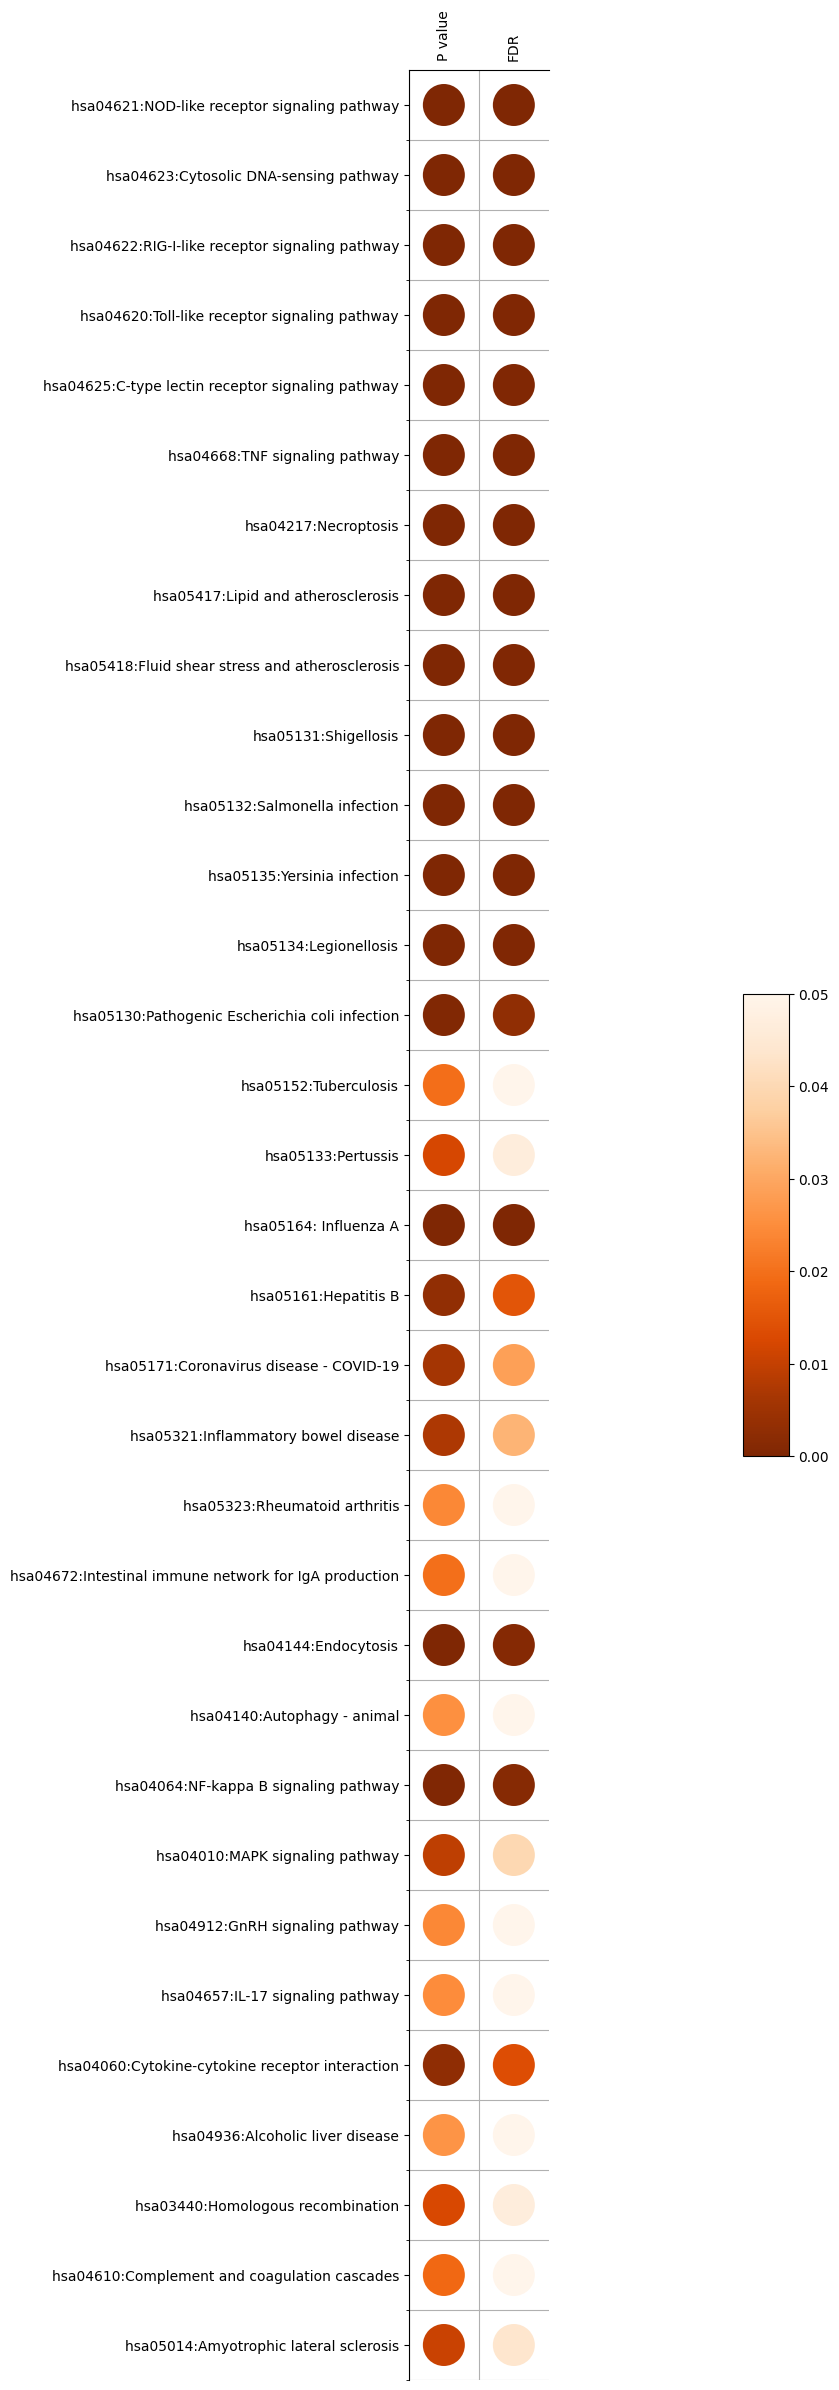

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import TwoSlopeNorm
import pandas as pd

cmap = 'Oranges_r'
# cmap = 'Oranges'
list1 = p_value_list[::-1]
list2 = fdr_list[::-1]

#retrieve unique labels
ylabels = pathway_name_list[::-1]
print(len(ylabels))
xlabels = ['P value', 'FDR']
ylabels_num_list = list(np.arange(0, len(ylabels))) + list(np.arange(0, len(ylabels)))
xlabels_num_list = len(ylabels) * [0] + len(ylabels) * [1]
xn = len(xlabels)
yn = len(ylabels)
#retrieve size and color information    
s = np.array(list1 + list2)
c = np.array(list1 + list2)

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(50, 30))
ax.set_xlim(-0.5, xn-0.5)
ax.set_ylim(-0.5, yn-0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

ax.set_xticks(np.arange(xn)-0.5, minor=True)
ax.set_yticks(np.arange(yn)-0.5, minor=True)

ax.grid(which='minor')
#ensure circles are displayed as circles
ax.set_aspect("equal", "box")

#create circles patches and colorbar
# R = 0.4 - s/s.max()/2
R = [0.3] * len(s)
# R = 0.3-s/(s.max()/0.3)
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]
# norm = TwoSlopeNorm(vmin=0, vmax=0.05, vcenter=0.01)
norm = TwoSlopeNorm(vmin=0, vmax=0.05, vcenter=0.025)
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm)
ax.add_collection(col)
# Move the x-axis ticks and labels to the top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
# Rotate x-axis labels
# plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xticks(rotation=90, fontsize=10)
sns.despine(left=False, bottom=True, top=False, right=True)
fig.colorbar(col, shrink=0.2, aspect=10)

In [ ]:
display(links_df)
links_df.to_csv('./analysis/gigtransformer-rownorm/t2ds_pathway_enrichment_analysis_links.csv', index=False)

In [ ]:
from pycirclize import Circos
from pycirclize.parser import Matrix
import pandas as pd

# Create from-to table dataframe & convert to matrix
fromto_table_df = links_df[['Term', 'Gene']]
fromto_table_df = fromto_table_df.rename(columns={'Term': 'from', 'Gene': 'to'})
fromto_table_df['value'] = [1] * len(fromto_table_df)
display(fromto_table_df)
matrix = Matrix.parse_fromto_table(fromto_table_df)
# print(matrix)

circos = Circos.initialize_from_matrix(
    matrix,
    space=1,
    # order='asc',
    # cmap=dict(A="royalblue", B="orange", C="green", D="red"),
    label_kws=dict(size=12),
)

# print(fromto_table_df.to_string(index=False))
fig = circos.plotfig()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

links_df['Value'] = [1] * len(links_df)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=links_df['Term'].tolist() + links_df['Gene'].tolist(),
    ),
    link=dict(
        source=links_df['Term'].apply(lambda x: links_df['Term'].tolist().index(x)),
        target=links_df['Gene'].apply(lambda x: links_df['Gene'].tolist().index(x) + len(links_df['Term'])),
        value=links_df['Value'],
    )
)])
fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame
links_df['Value'] = [1] * len(links_df)

# Combine all unique labels from 'Type', 'Pathway', and 'Gene' into one list
labels = links_df['Type'].unique().tolist() + links_df['Term'].unique().tolist() + links_df['Gene'].unique().tolist()

# Create mappings from labels to indices
label_to_index = {label: idx for idx, label in enumerate(labels)}

# Update DataFrame with indices for source and target nodes
links_df['Type_Index'] = links_df['Type'].map(lambda x: label_to_index[x])
links_df['Pathway_Index'] = links_df['Term'].map(lambda x: label_to_index[x])
links_df['Gene_Index'] = links_df['Gene'].map(lambda x: label_to_index[x])

# Create links for the Sankey diagram
links = pd.concat([
    pd.DataFrame({'source': links_df['Type_Index'], 'target': links_df['Pathway_Index'], 'value': links_df['Value']}),
    pd.DataFrame({'source': links_df['Pathway_Index'], 'target': links_df['Gene_Index'], 'value': links_df['Value']})
])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=5,
        thickness=40,
        line=dict(color="black", width=0.2),
        label=labels
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value']
    )
)])


fig.update_layout(
    title_text="Sankey Diagram",
    font_size=10,
    height=1500  # Set the height of the figure
)
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming links_df is your DataFrame
links_df['Value'] = [1] * len(links_df)

# ... rest of your code ...

# Define colors for the nodes based on their indices
node_colors = ['blue'] * (len(links_df['Type'].unique()) + len(links_df['Term'].unique())) + ['lightblue'] * len(links_df['Gene'].unique())

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=5,
        thickness=40,
        line=dict(color="black", width=0.2),
        label=labels,
        color=node_colors  # Use the node_colors list here
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value'],
        # To match link colors with source node colors
        color=[node_colors[node] for node in links['source']]
    )
)])

fig.update_layout(
    title_text="Sankey Diagram",
    font_size=10,
    height=1500  # Set the height of the figure
)
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming links_df is your DataFrame
links_df['Value'] = [1] * len(links_df)

# Combine all unique labels from 'Type', 'Pathway', and 'Gene' into one list
labels = links_df['Type'].unique().tolist() + links_df['Term'].unique().tolist() + links_df['Gene'].unique().tolist()

# Create mappings from labels to indices
label_to_index = {label: idx for idx, label in enumerate(labels)}

# Update DataFrame with indices for source and target nodes
links_df['Type_Index'] = links_df['Type'].map(lambda x: label_to_index[x])
links_df['Pathway_Index'] = links_df['Term'].map(lambda x: label_to_index[x])
links_df['Gene_Index'] = links_df['Gene'].map(lambda x: label_to_index[x])

# Define a color for each unique Type 
type_colors = {type: f'rgba({i * 50}, {i * 20}, {i * 70}, 0.5)' for i, type in enumerate(links_df['Type'].unique())}

# Create a color column in the DataFrame based on the Type column
links_df['Color'] = links_df['Type'].map(type_colors)

# Create links for the Sankey diagram
links = pd.concat([
    pd.DataFrame({'source': links_df['Type_Index'], 'target': links_df['Pathway_Index'], 'value': links_df['Value'], 'color': links_df['Color']}),
    pd.DataFrame({'source': links_df['Pathway_Index'], 'target': links_df['Gene_Index'], 'value': links_df['Value'], 'color': links_df['Color']})
])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=5,
        thickness=40,
        line=dict(color="black", width=0.2),
        label=labels
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value'],
        color=links['color']  # Use the color column from the links DataFrame
    )
)])

fig.update_layout(
    title_text="Sankey Diagram",
    font_size=10,
    height=1500  # Set the height of the figure
)
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Assuming links_df is your DataFrame
links_df['Value'] = [1] * len(links_df)

# Combine all unique labels from 'Type', 'Pathway', and 'Gene' into one list
labels = links_df['Type'].unique().tolist() + links_df['Term'].unique().tolist() + links_df['Gene'].unique().tolist()

# Create mappings from labels to indices
label_to_index = {label: idx for idx, label in enumerate(labels)}

# Update DataFrame with indices for source and target nodes
links_df['Type_Index'] = links_df['Type'].map(lambda x: label_to_index[x])
links_df['Pathway_Index'] = links_df['Term'].map(lambda x: label_to_index[x])
links_df['Gene_Index'] = links_df['Gene'].map(lambda x: label_to_index[x])

# Define a color for each unique Type
# type_colors = {type_: f'rgba({i * 50}, {i * 20}, {i * 70}, 0.5)' for i, type_ in enumerate(links_df['Type'].unique())}


# Get a color map from matplotlib
color_map = plt.cm.get_cmap('tab10', len(links_df['Type'].unique()))  # 'tab10' is a color map with distinct colors
# Define a color for each unique Type using the color map
type_colors = {type: f'rgba({int(r*255)},{int(g*255)},{int(b*255)},0.5)' for i, type in enumerate(links_df['Type'].unique()) for r, g, b, _ in [color_map(i)]}


# Map each Pathway to its corresponding Type color
pathway_colors = links_df.set_index('Term')['Type'].map(type_colors)

# Create a color list for nodes based on Type and Pathway
node_colors = [type_colors[type_] for type_ in links_df['Type'].unique()] + \
               [pathway_colors[pathway][1] for pathway in links_df['Term'].unique()] + \
               ['lightblue'] * len(links_df['Gene'].unique())

# Create a color column in the DataFrame based on the Type column
links_df['Color'] = links_df['Type'].map(type_colors)

# Create links for the Sankey diagram
links = pd.concat([
    pd.DataFrame({'source': links_df['Type_Index'], 'target': links_df['Pathway_Index'], 'value': links_df['Value'], 'color': links_df['Color']}),
    pd.DataFrame({'source': links_df['Pathway_Index'], 'target': links_df['Gene_Index'], 'value': links_df['Value'], 'color': links_df['Color']})
])

# Create links for the Sankey diagram
links = pd.concat([
    pd.DataFrame({'source': links_df['Type_Index'], 'target': links_df['Pathway_Index'], 'value': links_df['Value']}),
    pd.DataFrame({'source': links_df['Pathway_Index'], 'target': links_df['Gene_Index'], 'value': links_df['Value']})
])


# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=25,
        thickness=200,
        line=dict(color="black", width=0.2),
        label=labels,
        color=node_colors  # Use the node_colors list here
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value']
        # color=links['color']  # Use the color column from the links DataFrame
    )
)])

fig.update_layout(
    title_text="Sankey Diagram",
    font=dict(  # Modify this part
        size=30,
        color='black',  # Set font color to black
        family='Arial, bold'  # Set font family to Arial and bold
    ),
    width=3000,
    height=3000  # Set the height of the figure
)
fig.show()
